In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet


In [ ]:
import plotly.io as pio
pio.renders.default = 'colab'

In [ ]:
ticker = "TSLA"

# Download complete historical data (max available data)
tsla = yf.download(ticker, period="max")

# Display the first few rows
print(tsla.head())

# Save the data to a CSV file
tsla.to_csv("Tesla_stock_data.csv")

In [ ]:
df = pd.read_csv("Tesla_stock_data.csv")
df

,Date,Close,High,Low,Open,Volume
0,16-03-2020,29.671333,32.991333,29.478001,31.299999,307342500
1,17-03-2020,28.680000,31.456667,26.400000,29.334000,359919000
2,18-03-2020,24.081333,26.990667,23.367332,25.933332,356793000
3,19-03-2020,28.509333,30.133333,23.897333,24.980000,452932500
4,20-03-2020,28.502001,31.799999,28.386000,29.213333,424282500
...,...,...,...,...,...,...
246,08-03-2021,187.666672,206.710007,186.263336,200.183334,155361000
247,09-03-2021,224.526672,226.029999,198.403336,202.726669,202569900
248,10-03-2021,222.686661,239.283341,218.353332,233.433334,181817100
249,11-03-2021,233.199997,234.166672,225.726669,233.133331,108761700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   Close   251 non-null    float64
 2   High    251 non-null    float64
 3   Low     251 non-null    float64
 4   Open    251 non-null    float64
 5   Volume  251 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.9+ KB


In [ ]:
df.describe()

,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,138.379317,141.774422,134.254906,138.246369,1.853566e+08
std,78.329273,79.791610,76.367220,78.302853,9.918383e+07
min,24.081333,26.990667,23.367332,24.980000,4.547310e+07
25%,64.456333,66.461334,62.855667,64.967003,1.088487e+08
50%,136.166672,139.566666,133.886673,136.317337,1.668480e+08
75%,202.411667,209.264999,195.583336,202.183334,2.439548e+08
max,294.363342,300.133331,290.533325,297.126679,6.663786e+08


In [ ]:
px.area (df , x = 'Date' , y = 'Close')

In [ ]:
px.line (df , x = 'Date' , y = 'Close')

In [ ]:
px.area (df , x = 'Date' , y = 'Volume')

In [ ]:
px.box (df , y = 'Close')

In [ ]:
columns = ['Date' , 'Close']
ndf = pd.DataFrame (df , columns = columns)
ndf

,Date,Close
0,16-03-2020,29.671333
1,17-03-2020,28.680000
2,18-03-2020,24.081333
3,19-03-2020,28.509333
4,20-03-2020,28.502001
...,...,...
246,08-03-2021,187.666672
247,09-03-2021,224.526672
248,10-03-2021,222.686661
249,11-03-2021,233.199997


In [ ]:
prophet_df = ndf.rename (columns= {'Date' : 'ds' , 'Close' : 'y'})
prophet_df

,ds,y
0,16-03-2020,29.671333
1,17-03-2020,28.680000
2,18-03-2020,24.081333
3,19-03-2020,28.509333
4,20-03-2020,28.502001
...,...,...
246,08-03-2021,187.666672
247,09-03-2021,224.526672
248,10-03-2021,222.686661
249,11-03-2021,233.199997


In [ ]:
m = Prophet()
m.fit (prophet_df)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1133: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:287: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppyguy9_1/akz_wvw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppyguy9_1/6n1qzdka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1267', 'dat

In [ ]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict (future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,21.782858,-8.689610,49.723182,21.782858,21.782858,-1.971033,-1.971033,-1.971033,-1.971033,-1.971033,-1.971033,0.0,0.0,0.0,19.811825
1,2020-03-17,22.381567,-6.988413,52.429649,22.381567,22.381567,-0.826613,-0.826613,-0.826613,-0.826613,-0.826613,-0.826613,0.0,0.0,0.0,21.554954
2,2020-03-18,22.980276,-6.883549,50.291212,22.980276,22.980276,-1.180819,-1.180819,-1.180819,-1.180819,-1.180819,-1.180819,0.0,0.0,0.0,21.799456
3,2020-03-19,23.578985,-8.007711,51.297713,23.578985,23.578985,-1.295667,-1.295667,-1.295667,-1.295667,-1.295667,-1.295667,0.0,0.0,0.0,22.283318
4,2020-03-20,24.177694,-5.912293,52.308071,24.177694,24.177694,-2.592341,-2.592341,-2.592341,-2.592341,-2.592341,-2.592341,0.0,0.0,0.0,21.585353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,300.143644,270.776114,327.063773,299.815960,300.525941,-1.180819,-1.180819,-1.180819,-1.180819,-1.180819,-1.180819,0.0,0.0,0.0,298.962825
277,2021-04-08,300.962234,271.382458,325.218421,300.609941,301.363255,-1.295667,-1.295667,-1.295667,-1.295667,-1.295667,-1.295667,0.0,0.0,0.0,299.666567
278,2021-04-09,301.780823,271.295837,329.497497,301.405187,302.204725,-2.592341,-2.592341,-2.592341,-2.592341,-2.592341,-2.592341,0.0,0.0,0.0,299.188482
279,2021-04-10,302.599413,277.326935,333.120408,302.192365,303.054816,3.933235,3.933235,3.933235,3.933235,3.933235,3.933235,0.0,0.0,0.0,306.532647


In [ ]:
px.line (forecast , x = 'ds' , y = 'yhat')

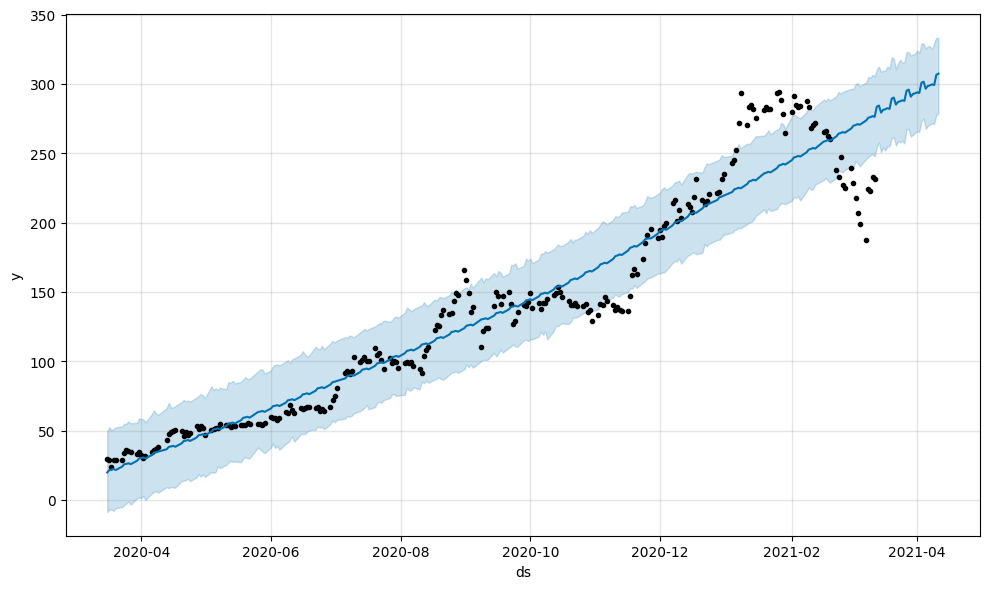

In [ ]:
figure = m.plot (forecast , xlabel = 'ds' , ylabel = 'y')

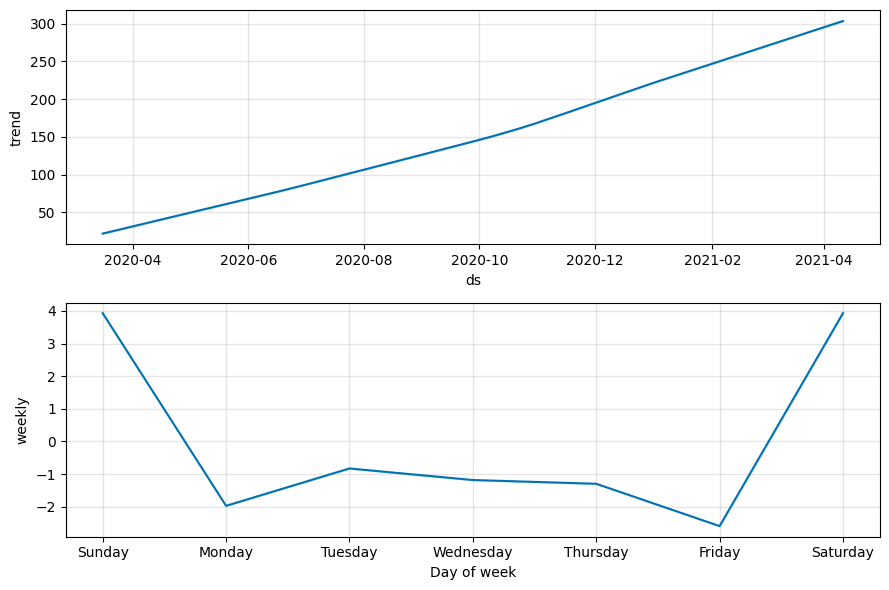

In [ ]:
figure2 = m.plot_components (forecast)

In [ ]:
from google.colab import files
forecast.to_csv ('forecast.csv')
files.download ('forecast.csv')